<a href="https://colab.research.google.com/github/Kobzarko/python_for_DA_tasks/blob/main/hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data_path ='/content/drive/MyDrive/Colab Notebooks/Data/yulu_rental.csv'

df = pd.read_csv(data_path)

Mounted at /content/drive


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<Axes: ylabel='Frequency'>

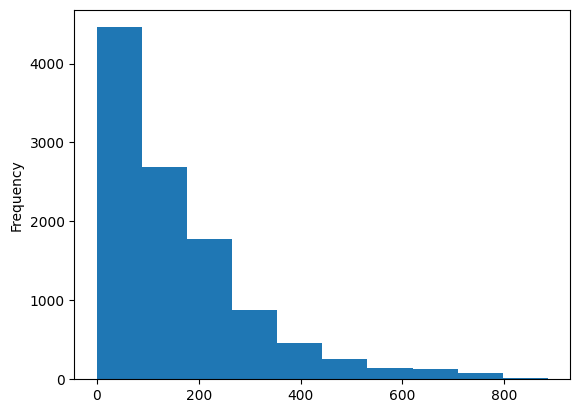

In [4]:
df['registered'].plot(kind='hist')

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

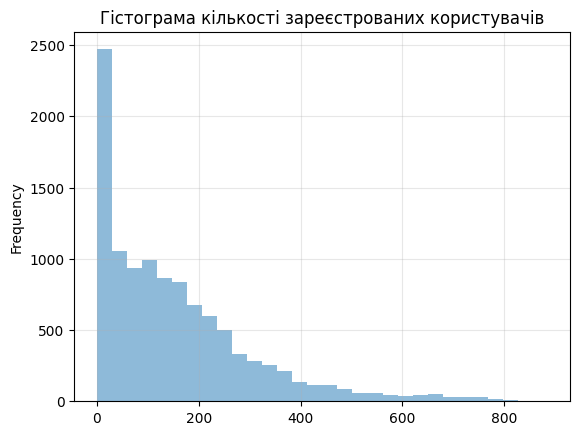

In [11]:
df['registered'].plot(kind='hist', bins=30, alpha =.5)
plt.grid(axis='both', alpha=.3)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.show();

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [12]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [43]:
# df['dayofweek'] = df.datetime.dt.day_of_week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['dayofweek'] = df.datetime.dt.day_name()


Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [45]:
df[['datetime','dayofweek']][df.dayofweek=='Monday'].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,Monday
48,2011-01-03 01:00:00,Monday
49,2011-01-03 04:00:00,Monday
50,2011-01-03 05:00:00,Monday
51,2011-01-03 06:00:00,Monday


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

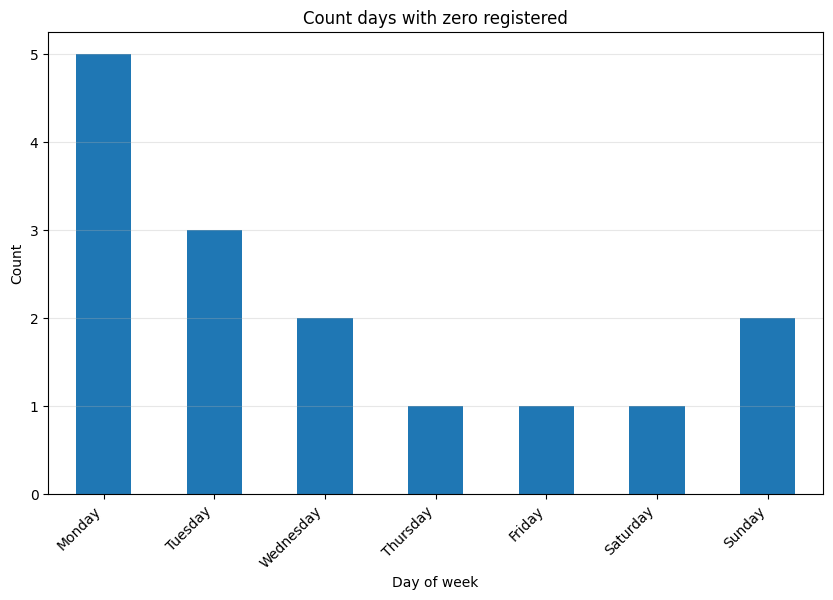

In [52]:
df_zero_registered = df[df['registered']==0]

# Перевпорядковує індекси (назви днів тижня) відповідно до вказаного порядку (days_order).
df_zero_registered = df_zero_registered.groupby('dayofweek').size().reindex(days_order)

plt.figure(figsize=(10,6))
df_zero_registered.plot(kind = 'bar', title = 'Count days with zero registered', xlabel = 'Day of week', ylabel = 'Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=.3)
plt.show();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [69]:
df.head()
df_weather = df.groupby('weather')['registered'].sum()
df_weather

,registered
weather,
1,1186163
2,419914
3,87106
4,158


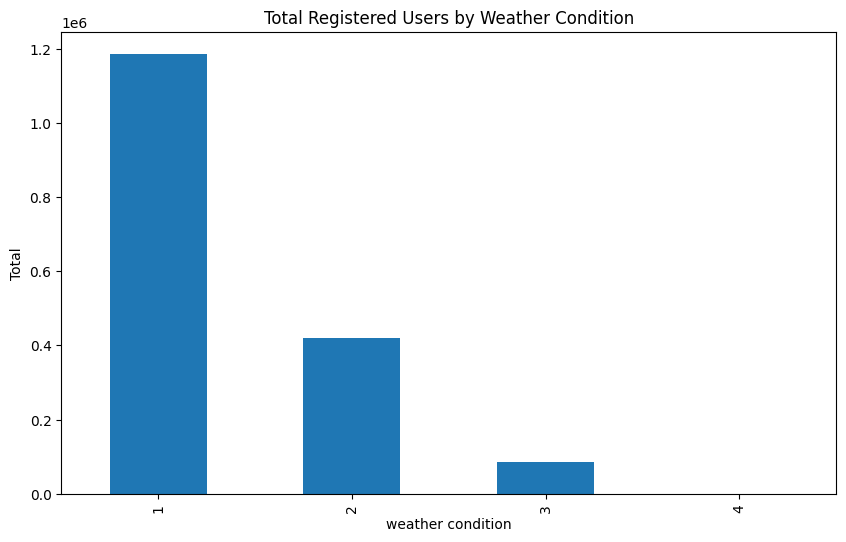

In [76]:
df_weather.plot.bar(figsize=(10,6))
plt.title('Total Registered Users by Weather Condition')
plt.xlabel('weather condition')
plt.ylabel('Total')
plt.show();


4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

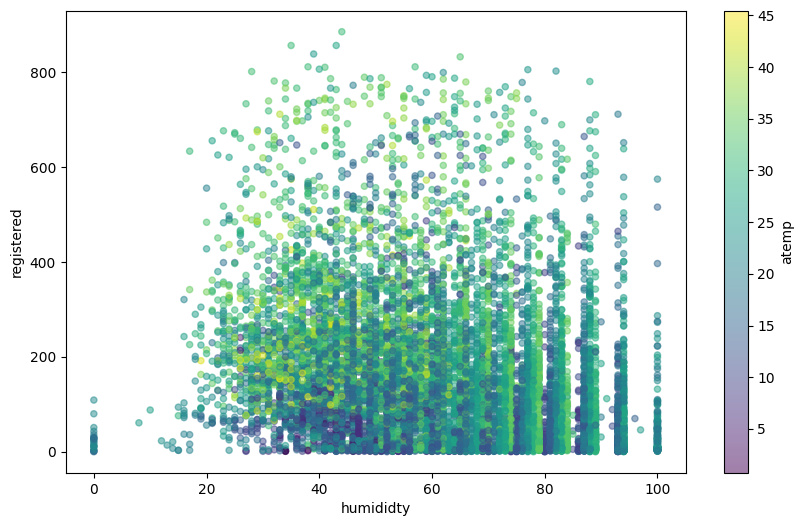

In [75]:
df.plot.scatter(x = 'humidity', y='registered', c='atemp', colormap = 'viridis', alpha = .5, figsize = (10,6))
plt.xlabel('humididty')
plt.ylabel('registered')
plt.show()

На побудованій діаграмі можна побачити, як вологість впливає на кількість зареєстрованих користувачів, при цьому колір точок буде вказувати на температуру за відчуттями. Це допомагає краще зрозуміти, як обидва параметри (`humidity` та `atemp`) взаємодіють із кількістю користувачів.

Цей графік є корисним для аналізу того, як погодні умови можуть впливати на використання сервісу оренди велосипедів.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)